In [1]:
# conda install openpyxl#安装openpyxl用于读取excel

# Reference
### 参考文献

<img src="https://www.researchgate.net/publication/340027734/figure/fig3/AS:870948379033601@1584661683144/Structure-of-improved-1D-LeNet-5-network-for-rolling-element-bearing-fault-diagnosis.png" width="35%"/>

# Load Data
### 加载数据

In [2]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading Dataset

In [3]:
train_data = np.array(pd.read_csv("../input/raman-data-raw/split_train_test_validation/train_data.csv", header=None))
train_target = np.array(pd.read_csv("../input/raman-data-raw/split_train_test_validation/train_target.csv", header=None))

test_data = np.array(pd.read_csv("../input/raman-data-raw/split_train_test_validation/test_data.csv", header=None))
test_target = np.array(pd.read_csv("../input/raman-data-raw/split_train_test_validation/test_target.csv", header=None))

validation_data = np.array(pd.read_csv("../input/raman-data-raw/split_train_test_validation/validation_data.csv", header=None))
validation_target = np.array(pd.read_csv("../input/raman-data-raw/split_train_test_validation/validation_target.csv", header=None))

In [4]:
#归一化
train_data = train_data/train_data.max()
test_data = test_data/test_data.max()
validation_data = validation_data/validation_data.max()

In [5]:
#数据整形
train_target = train_target.reshape(train_target.shape[0])
test_target = test_target.reshape(test_target.shape[0])
validation_target = validation_target.reshape(validation_target.shape[0])

train_data = train_data.reshape(-1, train_data.shape[1], 1)
test_data = test_data.reshape(-1, test_data.shape[1], 1)
validation_data = validation_data.reshape(-1, validation_data.shape[1], 1)

In [6]:
#绘图函数
def print_history(history):
    # 绘制训练 & 验证的准确率值
    plt.plot(history.history['accuracy'], c='r')
    plt.plot(history.history['val_accuracy'], c='orange')
    plt.plot(history.history['loss'], c='g')
    plt.plot(history.history['val_loss'], c='b')
    plt.title('Model accuracy&loss')
    plt.xlabel('Epoch')
    plt.legend(['Train_acc', 'Val_acc', 'Train_loss', 'Val_loss'])
    plt.show()

# Get The best **Batch Size**
### 获取最佳batch size参数

In [7]:
def train_LeNet_batch_size(batch_size):
    model = Sequential()
    model.add(keras.layers.Conv1D(6, kernel_size=64, activation='relu', input_shape=train_data.shape[1:], padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 8))

    model.add(keras.layers.Conv1D(16, kernel_size=64, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(64, kernel_size=16, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 8, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 4, activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.2), metrics=['accuracy'])
    
    history = model.fit(train_data,train_target,validation_data = (validation_data,validation_target),epochs=10,batch_size=batch_size, verbose=0, shuffle=False)
    model.evaluate(test_data, test_target)
    print('Batch Size:', batch_size)
    print(history.params)
    print_history(history) #调用绘图函数

5/5 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5350
Batch Size: 1
{'verbose': 0, 'epochs': 10, 'steps': 471}


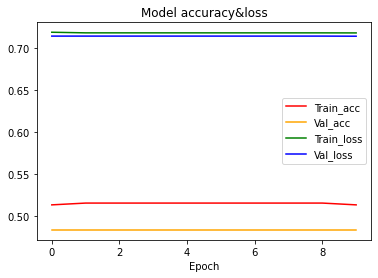

5/5 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8854
Batch Size: 5
{'verbose': 0, 'epochs': 10, 'steps': 95}


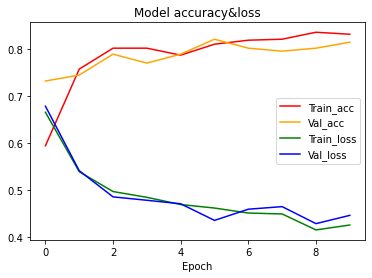

5/5 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8790
Batch Size: 10
{'verbose': 0, 'epochs': 10, 'steps': 48}


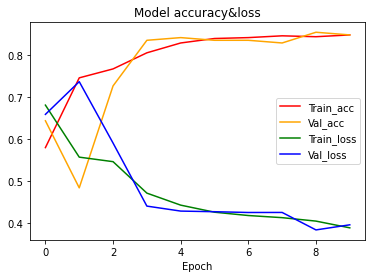

5/5 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9172
Batch Size: 20
{'verbose': 0, 'epochs': 10, 'steps': 24}


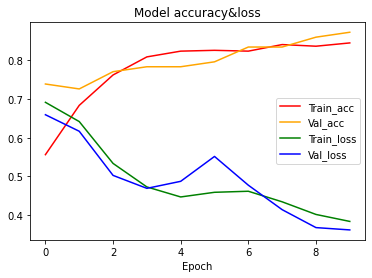

In [8]:
#Try to know the range of batch size!!!             ABOUT 10-20
train_LeNet_batch_size(1)
train_LeNet_batch_size(5)
train_LeNet_batch_size(10)
train_LeNet_batch_size(20)

5/5 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8790
Batch Size: 10
{'verbose': 0, 'epochs': 10, 'steps': 48}


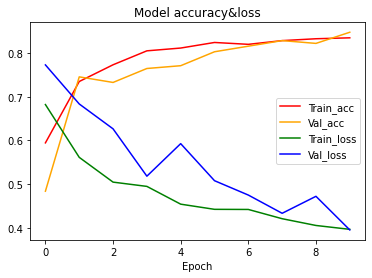

5/5 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8854
Batch Size: 11
{'verbose': 0, 'epochs': 10, 'steps': 43}


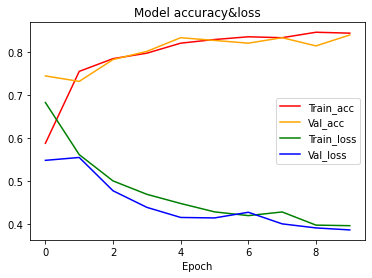

5/5 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9045
Batch Size: 12
{'verbose': 0, 'epochs': 10, 'steps': 40}


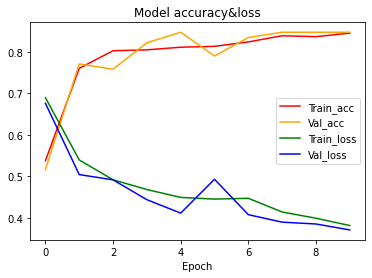

5/5 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8790
Batch Size: 13
{'verbose': 0, 'epochs': 10, 'steps': 37}


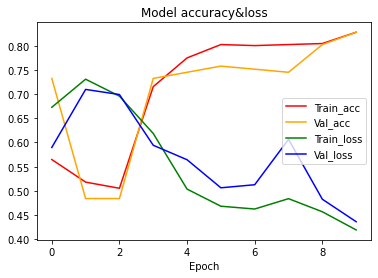

5/5 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.9108
Batch Size: 14
{'verbose': 0, 'epochs': 10, 'steps': 34}


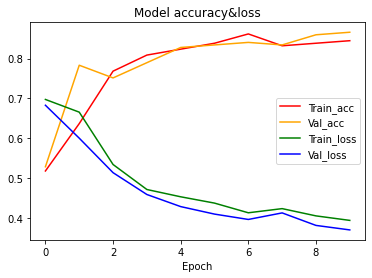

5/5 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9299
Batch Size: 15
{'verbose': 0, 'epochs': 10, 'steps': 32}


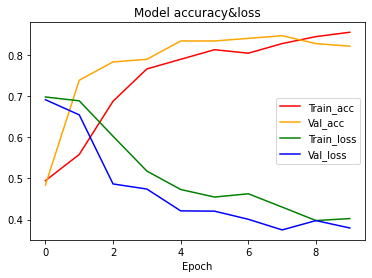

5/5 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9045
Batch Size: 16
{'verbose': 0, 'epochs': 10, 'steps': 30}


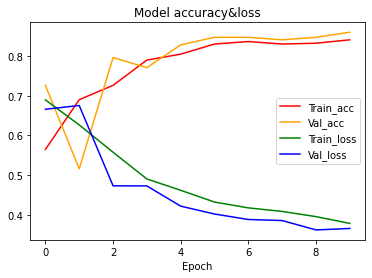

5/5 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9172
Batch Size: 17
{'verbose': 0, 'epochs': 10, 'steps': 28}


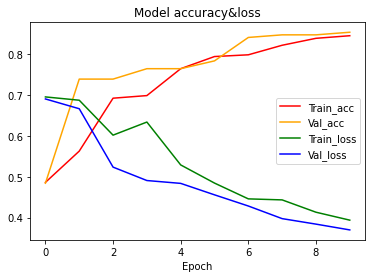

5/5 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8790
Batch Size: 18
{'verbose': 0, 'epochs': 10, 'steps': 27}


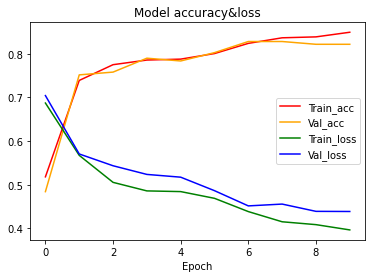

5/5 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8790
Batch Size: 19
{'verbose': 0, 'epochs': 10, 'steps': 25}


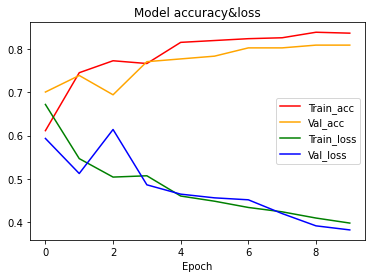

In [9]:
for i in range(10):
    train_LeNet_batch_size(10+i)

### Best batch size:**17**

# Get The best **Learning Rate**
### 获取最佳learning rate

In [10]:
def train_LeNet_learing_rate(learning_rate):
    model = Sequential()
    model.add(keras.layers.Conv1D(6, kernel_size=64, activation='relu', input_shape=train_data.shape[1:], padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 8))

    model.add(keras.layers.Conv1D(16, kernel_size=64, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(64, kernel_size=16, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 8, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 4, activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=learning_rate), metrics=['accuracy'])
    
    history = model.fit(train_data,train_target,validation_data = (validation_data,validation_target),epochs=10,batch_size=17, verbose=0, shuffle=False)
    model.evaluate(test_data, test_target)
    
#     history = model.fit(train_data,train_lable,validation_data = (test_data,test_lable),epochs=10,batch_size=14, verbose=0, shuffle=False)
#     model.evaluate(test_data, test_lable)
    print('Learning Rate', learning_rate)
    print(history.params)
    print_history(history) #调用绘图函数

5/5 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5350
Learning Rate 0.001
{'verbose': 0, 'epochs': 10, 'steps': 28}


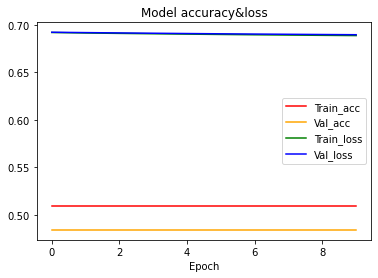

5/5 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7962
Learning Rate 0.01
{'verbose': 0, 'epochs': 10, 'steps': 28}


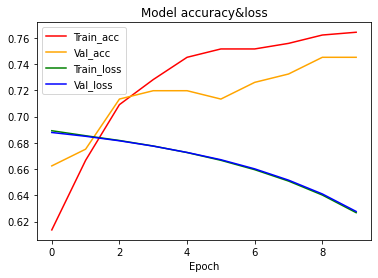

5/5 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9236
Learning Rate 0.1
{'verbose': 0, 'epochs': 10, 'steps': 28}


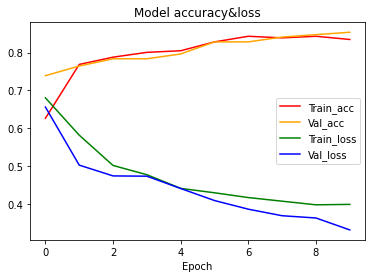

5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5350
Learning Rate 1
{'verbose': 0, 'epochs': 10, 'steps': 28}


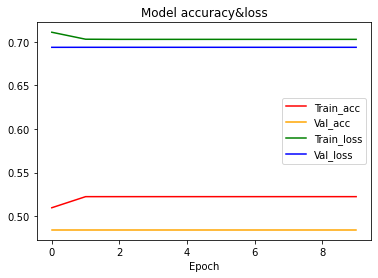

5/5 [==============================] - 0s 2ms/step - loss: 2.5940 - accuracy: 0.5350
Learning Rate 10
{'verbose': 0, 'epochs': 10, 'steps': 28}


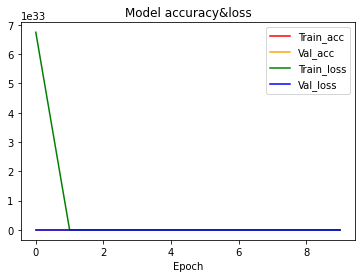

In [11]:
#Try to know the range of learning rate!!!             ABOUT 0.01-0.1
train_LeNet_learing_rate(0.001)
train_LeNet_learing_rate(0.01)
train_LeNet_learing_rate(0.1)
train_LeNet_learing_rate(1)
train_LeNet_learing_rate(10)

5/5 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8217
Learning Rate 0.01
{'verbose': 0, 'epochs': 10, 'steps': 28}


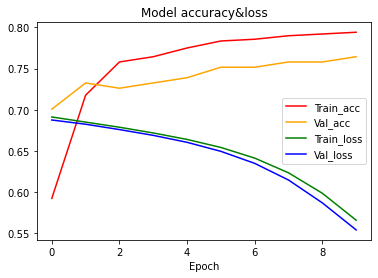

5/5 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8344
Learning Rate 0.02
{'verbose': 0, 'epochs': 10, 'steps': 28}


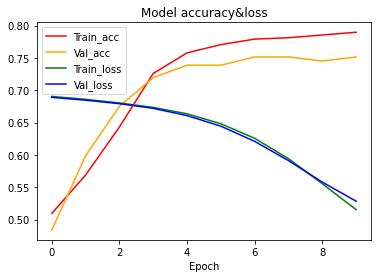

5/5 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8153
Learning Rate 0.03
{'verbose': 0, 'epochs': 10, 'steps': 28}


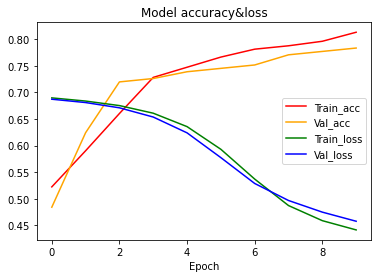

5/5 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8790
Learning Rate 0.04
{'verbose': 0, 'epochs': 10, 'steps': 28}


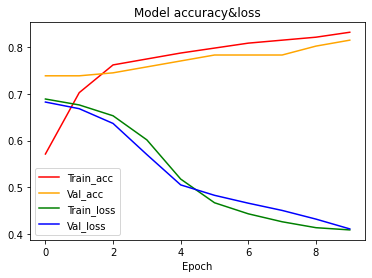

5/5 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.8917
Learning Rate 0.05
{'verbose': 0, 'epochs': 10, 'steps': 28}


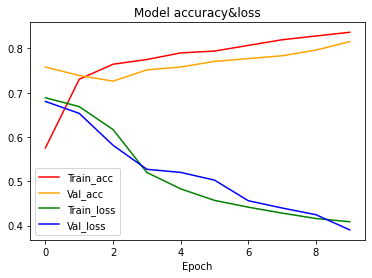

5/5 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9108
Learning Rate 0.060000000000000005
{'verbose': 0, 'epochs': 10, 'steps': 28}


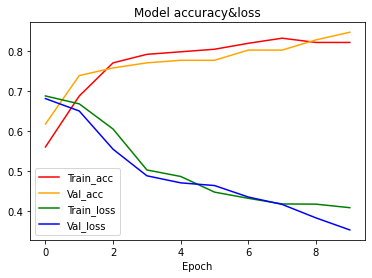

5/5 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9236
Learning Rate 0.06999999999999999
{'verbose': 0, 'epochs': 10, 'steps': 28}


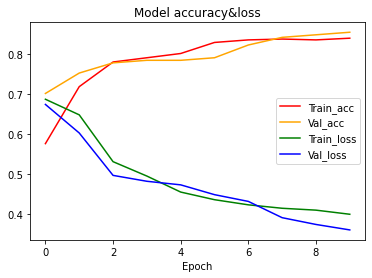

5/5 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9236
Learning Rate 0.08
{'verbose': 0, 'epochs': 10, 'steps': 28}


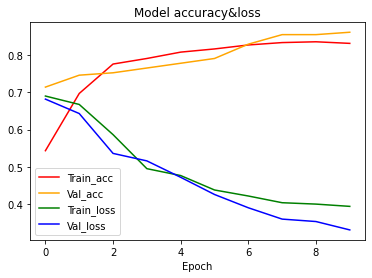

5/5 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.9172
Learning Rate 0.09
{'verbose': 0, 'epochs': 10, 'steps': 28}


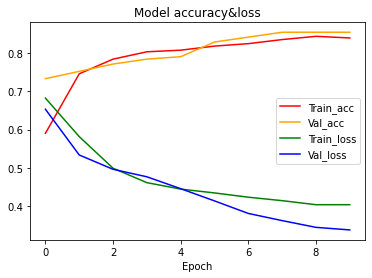

5/5 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9172
Learning Rate 0.09999999999999999
{'verbose': 0, 'epochs': 10, 'steps': 28}


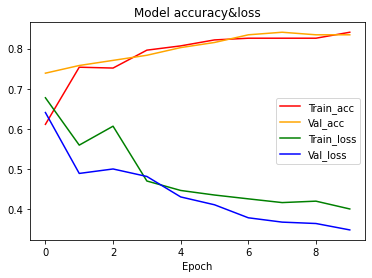

5/5 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9236
Learning Rate 0.11
{'verbose': 0, 'epochs': 10, 'steps': 28}


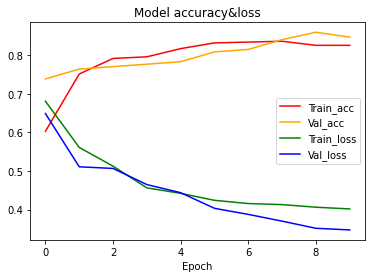

5/5 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9108
Learning Rate 0.12
{'verbose': 0, 'epochs': 10, 'steps': 28}


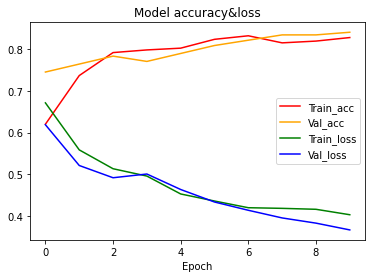

5/5 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9299
Learning Rate 0.13
{'verbose': 0, 'epochs': 10, 'steps': 28}


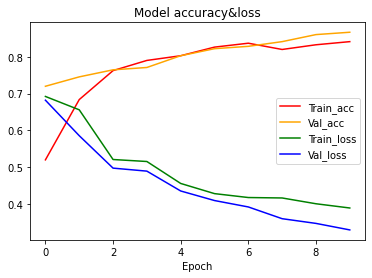

5/5 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9108
Learning Rate 0.14
{'verbose': 0, 'epochs': 10, 'steps': 28}


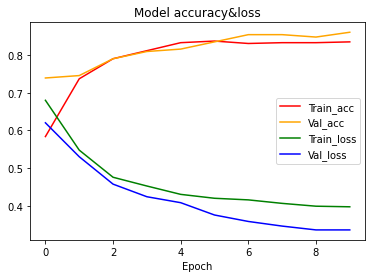

5/5 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.9108
Learning Rate 0.15000000000000002
{'verbose': 0, 'epochs': 10, 'steps': 28}


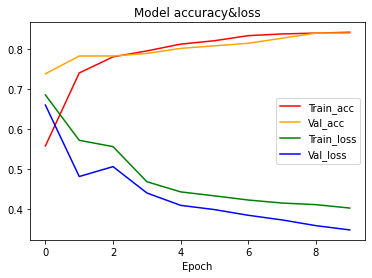

5/5 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9236
Learning Rate 0.16
{'verbose': 0, 'epochs': 10, 'steps': 28}


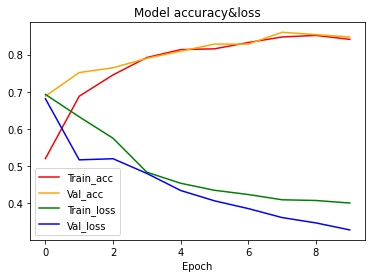

5/5 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.9236
Learning Rate 0.17
{'verbose': 0, 'epochs': 10, 'steps': 28}


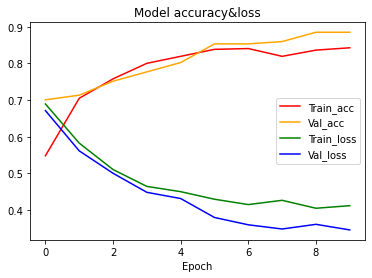

5/5 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.9108
Learning Rate 0.18000000000000002
{'verbose': 0, 'epochs': 10, 'steps': 28}


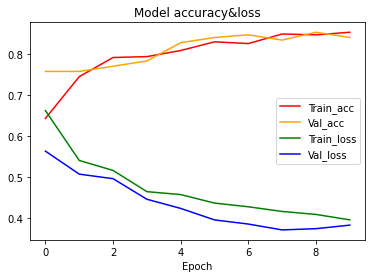

5/5 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.9363
Learning Rate 0.19
{'verbose': 0, 'epochs': 10, 'steps': 28}


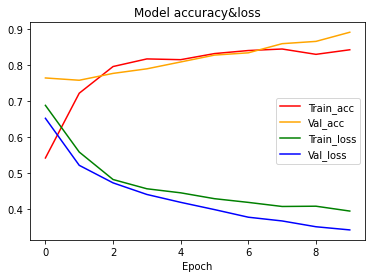

5/5 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.9427
Learning Rate 0.2
{'verbose': 0, 'epochs': 10, 'steps': 28}


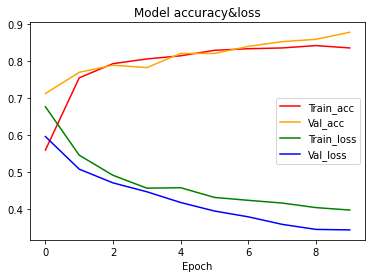

In [12]:
for i in range(20):
    train_LeNet_learing_rate(0.01+i*0.01)

### Best learning rate:**0.13**

# Get The best **Epochs**
### 绘制图像获知最佳epochs

In [13]:
def train_LeNet(epochs):
    model = Sequential()
    model.add(keras.layers.Conv1D(6, kernel_size=64, activation='relu', input_shape=train_data.shape[1:], padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 8))

    model.add(keras.layers.Conv1D(16, kernel_size=64, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(64, kernel_size=16, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 8, activation='relu', padding='same'))
    model.add(keras.layers.MaxPool1D(pool_size = 2))

    model.add(keras.layers.Conv1D(32, 4, activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.13), metrics=['accuracy'])
    
    history = model.fit(train_data,train_target,validation_data = (validation_data,validation_target),epochs=epochs,batch_size=17, verbose=0, shuffle=False)
    model.evaluate(test_data, test_target)
    
#     history = model.fit(train_data,train_lable,validation_data = (test_data,test_lable),epochs=epochs,batch_size=17, verbose=0, shuffle=False)
#     model.evaluate(test_data, test_lable)
    print(history.params)
    print_history(history) #调用绘图函数

5/5 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9554
{'verbose': 0, 'epochs': 100, 'steps': 28}


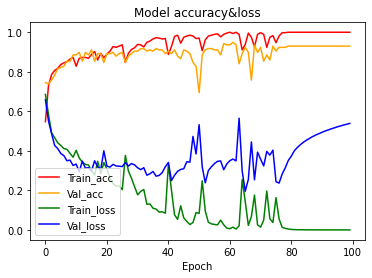

In [14]:
train_LeNet(100)

### Best epochs:**ABOUT 45-60?**